In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy import stats

#functions
import wrangle as w



warnings.filterwarnings("ignore")

#evaluate
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from statsmodels.formula.api import ols
import sklearn.preprocessing

#feature engineering
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = w.zillow17()

In [3]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1087254,10711855,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,...,6.037113e+13,-0.007357,2017-07-07,None,None,None,Central,Single Family Residential,None,None
1,1072280,10711877,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,...,6.037113e+13,0.021066,2017-08-29,Central,None,None,Central,Single Family Residential,None,None
2,1340933,10711888,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,...,6.037113e+13,0.077174,2017-04-04,Central,None,None,Central,Single Family Residential,None,None
3,1878109,10711910,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,...,6.037113e+13,-0.041238,2017-03-17,None,None,None,Central,Single Family Residential,None,None
4,2190858,10711923,NaN,NaN,NaN,2.0,4.0,NaN,8.0,2.0,...,6.037113e+13,-0.009496,2017-03-24,None,None,None,Central,Single Family Residential,None,None


In [4]:
df.calculatedfinishedsquarefeet.describe()

count    77374.000000
mean      1784.948497
std        954.265049
min        128.000000
25%       1182.000000
50%       1542.000000
75%       2112.000000
max      35640.000000
Name: calculatedfinishedsquarefeet, dtype: float64

(0.0, 2000.0)

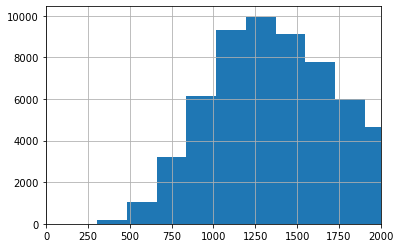

In [8]:
df.calculatedfinishedsquarefeet.hist(bins=200)
plt.xlim(0, 2000)

In [10]:
(df['calculatedfinishedsquarefeet']<350).sum()

12

In [ ]:
(df['calculatedfinishedsquarefeet']<350).sum()


~~31	Commercial/Office/Residential Mixed Used~~

~~46	Multi-Story Store~~

~~47	Store/Office (Mixed Use)~~

~~246	Duplex (2 Units, Any Combination)~~

~~247	Triplex (3 Units, Any Combination)~~

~~248	Quadruplex (4 Units, Any Combination)~~

260	Residential General: 2996

261	Single Family Residential

~~262	Rural Residence~~ NONE

263	Mobile Home

264	Townhouse

265	Cluster Home NULL, count: 186

266	Condominium

~~267	Cooperative~~ count: 12

~~268	Row House~~ NONE

269	Planned Unit Development

~~270	Residential Common Area~~

~~271	Timeshare~~

~~273	Bungalow~~ NONE

~~274	Zero Lot Line~~ NONE

275	Manufactured, Modular, Prefabricated Homes NULL, count:40

~~276	Patio Home~~ NONE

~~279	Inferred Single Family Residential~~

~~290	Vacant Land - General~~

~~291	Residential Vacant Land~~


In [4]:
df = df.set_index("parcelid")

In [5]:
df.head()

,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,1087254,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,...,6.037113e+13,-0.007357,2017-07-07,None,None,None,Central,Single Family Residential,None,None
10711877,1072280,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,...,6.037113e+13,0.021066,2017-08-29,Central,None,None,Central,Single Family Residential,None,None
10711888,1340933,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,...,6.037113e+13,0.077174,2017-04-04,Central,None,None,Central,Single Family Residential,None,None
10711910,1878109,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,...,6.037113e+13,-0.041238,2017-03-17,None,None,None,Central,Single Family Residential,None,None
10711923,2190858,NaN,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,...,6.037113e+13,-0.009496,2017-03-24,None,None,None,Central,Single Family Residential,None,None


In [6]:
df.to_csv(r'~/Codeup/codeup-data-science/zillow_clustering_project/notebooks/zillow.csv')

In [2]:
df = pd.read_csv('zillow.csv')

In [3]:
df.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,10711855,1087254,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,...,6.037113e+13,-0.007357,2017-07-07,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
1,10711877,1072280,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,...,6.037113e+13,0.021066,2017-08-29,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
2,10711888,1340933,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,...,6.037113e+13,0.077174,2017-04-04,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
3,10711910,1878109,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,...,6.037113e+13,-0.041238,2017-03-17,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,10711923,2190858,NaN,NaN,NaN,2.0,4.0,NaN,8.0,2.0,...,6.037113e+13,-0.009496,2017-03-24,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [3]:
df.shape

(77574, 68)

In [4]:
single_use = [260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 273, 275, 276, 279]
df = df[df.propertylandusetypeid.isin(single_use)]

In [5]:
df.shape

(74270, 68)

In [6]:
#df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull())\
#            & (df.calculatedfinishedsquarefeet>500)]

In [7]:
#df.shape

(73561, 68)

In [6]:
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull())\
            & (df.calculatedfinishedsquarefeet>350)]

In [7]:
df.shape

(73705, 68)

In [8]:
#z = w.drop_based_on_pct(df, .6, .7)

In [9]:
#z.shape

(73705, 34)

In [8]:
df = w.drop_based_on_pct(df, .6, .7)

In [9]:
df.shape

(73705, 34)

In [10]:
df['county'] = np.where(df.fips == 6037, 'Los_Angeles',
                       np.where(df.fips == 6059, 'Orange',
                               'Ventura'))

In [11]:
df.shape

(73705, 35)

In [12]:
df = df.drop(['id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc',
        'censustractandblock', 'propertylandusedesc', 'heatingorsystemdesc'],axis=1)

In [13]:
df.shape

(73705, 24)

In [14]:
df.rename(columns={"bathroomcnt": "bathrooms", 
                   "bedroomcnt": "bedrooms",
                   "buildingqualitytypeid": "property_quality", 
                   "calculatedfinishedsquarefeet": "sqft",
                   "lotsizesquarefeet": "lot_sqft",
                   "regionidzip": "zip_code",
                   "landtaxvaluedollarcnt": "land_value",
                   "structuretaxvaluedollarcnt": "structure_value",
                   "taxvaluedollarcnt": "home_value",
                   "heatingorsystemdesc": "heating_system",
                  }, inplace=True)

In [15]:
df.shape

(73705, 24)

In [17]:
df.head(2)

,parcelid,bathrooms,bedrooms,property_quality,sqft,fips,latitude,longitude,lot_sqft,rawcensustractandblock,...,unitcnt,yearbuilt,structure_value,home_value,assessmentyear,land_value,taxamount,logerror,transactiondate,county
0,10711855,2.0,3.0,8.0,2107.0,6037.0,34222559.0,-118617387.0,9158.0,6.037113e+07,...,1.0,1972.0,249655.0,624139.0,2016.0,374484.0,7659.36,-0.007357,2017-07-07,Los_Angeles
1,10711877,2.0,4.0,8.0,1882.0,6037.0,34220261.0,-118616409.0,9035.0,6.037113e+07,...,1.0,1972.0,253000.0,660000.0,2016.0,407000.0,8123.91,0.021066,2017-08-29,Los_Angeles


In [18]:
df.isnull().sum()

parcelid                      0
bathrooms                     0
bedrooms                      0
property_quality          26884
sqft                          0
fips                          0
latitude                      0
longitude                     0
lot_sqft                   8121
rawcensustractandblock        0
regionidcity               1437
regionidcounty                0
zip_code                     43
roomcnt                       0
unitcnt                   26570
yearbuilt                    35
structure_value              75
home_value                    1
assessmentyear                0
land_value                    1
taxamount                     5
logerror                      0
transactiondate               0
county                        0
dtype: int64

In [15]:
df[df['unitcnt'].isnull()].T

,137,2168,2169,2170,2171,2172,2173,2174,2175,2176,...,77539,77540,77541,77542,77543,77544,77545,77546,77547,77548
parcelid,10717985,10794853,10794855,10794876,10794889,10794891,10794906,10794909,10794921,10794923,...,17300850,17300852,17300860,17300863,79640490,93577187,162960516,162960529,162960596,162960814
id,642531,2385878,223477,2520019,2251771,1192913,939333,2490117,1192839,1476217,...,2074306,224867,1224099,1821141,2133032,1699893,1686026,2415168,1134005,1671696
bathrooms,3,2,2,2,1,2,2,2,2,1,...,3.5,3,3,5.5,2.5,2,2.5,4,2,3
bedrooms,4,2,3,2,1,2,2,2,2,1,...,4,3,4,5,3,2,3,4,4,5
property_quality,8,7,7,7,7,7,7,7,7,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calculatedbathnbr,3,2,2,2,1,2,2,2,2,1,...,3.5,3,3,5.5,2.5,2,2.5,4,2,3
sqft,2478,1050,1280,1050,640,1060,1050,1050,1050,650,...,3080,2250,2560,4983,1688,900,1449,2459,1379,2754
finishedsquarefeet12,2478,1050,1280,1050,640,1060,1050,1050,1050,650,...,3080,2250,2560,4983,1688,900,1449,2459,1379,2754
fips,6037,6037,6037,6037,6037,6037,6037,6037,6037,6037,...,6111,6111,6111,6111,6059,6111,6111,6111,6111,6111
fullbathcnt,3,2,2,2,1,2,2,2,2,1,...,3,3,3,5,2,2,2,4,2,3


In [5]:
df['regionidcounty'].value_counts()

3101.0    50694
1286.0    20630
2061.0     6250
Name: regionidcounty, dtype: int64

In [17]:
df[df['unitcnt'].isnull()]

,parcelid,bathrooms,bedrooms,property_quality,sqft,fips,latitude,longitude,lot_sqft,rawcensustractandblock,...,unitcnt,yearbuilt,structure_value,taxvaluedollarcnt,assessmentyear,land_value,taxamount,logerror,transactiondate,county
137,10717985,3.0,4.0,8.0,2478.0,6037.0,34209133.0,-118657791.0,9417.0,6.037134e+07,...,NaN,1995.0,301711.0,464491.0,2016.0,162780.0,5801.39,0.011914,2017-06-30,Los_Angeles
2168,10794853,2.0,2.0,7.0,1050.0,6037.0,34183500.0,-118596000.0,134581.0,6.037135e+07,...,NaN,2010.0,242340.0,446709.0,2016.0,204369.0,5409.89,0.020882,2017-08-31,Los_Angeles
2169,10794855,2.0,3.0,7.0,1280.0,6037.0,34183500.0,-118596000.0,134581.0,6.037135e+07,...,NaN,2010.0,326268.0,466324.0,2016.0,140056.0,5653.42,-0.026507,2017-04-03,Los_Angeles
2170,10794876,2.0,2.0,7.0,1050.0,6037.0,34183500.0,-118596000.0,134581.0,6.037135e+07,...,NaN,2010.0,242340.0,448740.0,2016.0,206400.0,5434.10,0.048805,2017-03-10,Los_Angeles
2171,10794889,1.0,1.0,7.0,640.0,6037.0,34183500.0,-118596000.0,134581.0,6.037135e+07,...,NaN,2010.0,177272.0,253245.0,2016.0,75973.0,3093.68,-0.002248,2017-08-22,Los_Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77544,93577187,2.0,2.0,NaN,900.0,6111.0,34212400.0,-119027000.0,NaN,6.111006e+07,...,NaN,2006.0,108211.0,309621.0,2016.0,201410.0,3280.22,0.018730,2017-03-15,Ventura
77545,162960516,2.5,3.0,NaN,1449.0,6111.0,34273914.0,-119164501.0,6926.0,6.111001e+07,...,NaN,1986.0,288913.0,481521.0,2016.0,192608.0,5063.30,0.015797,2017-05-08,Ventura
77546,162960529,4.0,4.0,NaN,2459.0,6111.0,34245590.0,-119169692.0,5400.0,6.111005e+07,...,NaN,2007.0,169000.0,479000.0,2016.0,310000.0,12285.88,0.007117,2017-05-26,Ventura
77547,162960596,2.0,4.0,NaN,1379.0,6111.0,34219587.0,-119042663.0,7343.0,6.111006e+07,...,NaN,1960.0,224567.0,449134.0,2016.0,224567.0,4787.16,0.032018,2017-07-18,Ventura


In [16]:
df[df['unitcnt'].isnull()].propertylandusetypeid.value_counts()

# 261 Single Family Residential
# 266 Condominium
# 265 Cluster Home
# 275 Manufactured, Modular, Prefabricated Homes
# 263 Mobile Home
# 269 Planned Unit Development

# let's change to 1!

261.0    18474
266.0     7714
265.0      335
275.0       35
263.0        7
269.0        5
Name: propertylandusetypeid, dtype: int64

In [16]:
df.unitcnt.fillna(1, inplace = True)

In [17]:
df.shape

(73705, 24)

In [21]:
df.isnull().sum()

parcelid                      0
bathrooms                     0
bedrooms                      0
property_quality          26884
sqft                          0
fips                          0
latitude                      0
longitude                     0
lot_sqft                   8121
rawcensustractandblock        0
regionidcity               1437
regionidcounty                0
zip_code                     43
roomcnt                       0
unitcnt                       0
yearbuilt                    35
structure_value              75
home_value                    1
assessmentyear                0
land_value                    1
taxamount                     5
logerror                      0
transactiondate               0
county                        0
dtype: int64

In [22]:
df.property_quality.value_counts(dropna = False)

NaN     26884
8.0     14488
6.0     12906
4.0      8234
7.0      5917
9.0      2264
5.0      1500
11.0      926
10.0      308
3.0       150
12.0      115
1.0        10
2.0         3
Name: property_quality, dtype: int64

<AxesSubplot:>

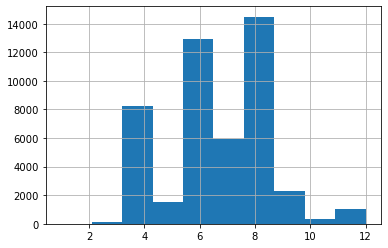

In [23]:
df.property_quality.hist()

In [23]:
df.property_quality.median()

7.0

In [24]:
df.property_quality.mean()

6.635548151470494

In [18]:
df.property_quality.fillna(7.0, inplace = True)

In [19]:
df.shape

(73705, 24)

In [27]:
df.isnull().sum()

parcelid                     0
bathrooms                    0
bedrooms                     0
property_quality             0
sqft                         0
fips                         0
latitude                     0
longitude                    0
lot_sqft                  8121
rawcensustractandblock       0
regionidcity              1437
regionidcounty               0
zip_code                    43
roomcnt                      0
unitcnt                      0
yearbuilt                   35
structure_value             75
home_value                   1
assessmentyear               0
land_value                   1
taxamount                    5
logerror                     0
transactiondate              0
county                       0
dtype: int64

(0.0, 40000.0)

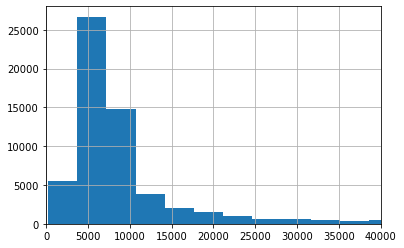

In [35]:
df.lot_sqft.hist(bins=2000)
plt.xlim(0, 40000)

In [28]:
df.lot_sqft.median()

7265.0

In [20]:
df.lot_sqft.fillna(7265, inplace = True)

In [21]:
df.shape

(73705, 24)

In [31]:
df.isnull().sum()

parcelid                     0
bathrooms                    0
bedrooms                     0
property_quality             0
sqft                         0
fips                         0
latitude                     0
longitude                    0
lot_sqft                     0
rawcensustractandblock       0
regionidcity              1437
regionidcounty               0
zip_code                    43
roomcnt                      0
unitcnt                      0
yearbuilt                   35
structure_value             75
home_value                   1
assessmentyear               0
land_value                   1
taxamount                    5
logerror                     0
transactiondate              0
county                       0
dtype: int64

In [42]:
(df.isnull().sum()).sum()

1597

In [47]:
df.regionidcity.value_counts()

12447.0     16345
46298.0      2306
54311.0      1881
5534.0       1872
52650.0      1664
            ...  
118880.0        5
10815.0         4
13311.0         4
21395.0         1
36078.0         1
Name: regionidcity, Length: 175, dtype: int64

In [48]:
(df.regionidcity.value_counts()).sum()

72268

In [49]:
(df.regionidcity.value_counts()).median()

211.0

In [22]:
df = df.dropna()

In [23]:
df.shape

(72153, 24)

## Outliers

<AxesSubplot:xlabel='home_value'>

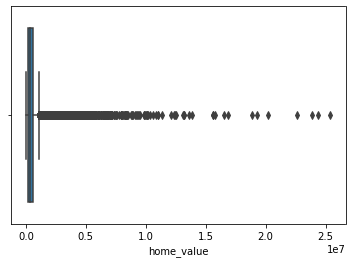

In [34]:
sns.boxplot(x="home_value", data=df)

<AxesSubplot:>

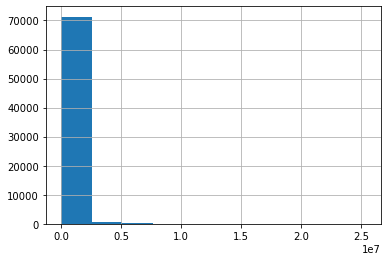

In [28]:
df.home_value.hist()

In [29]:
df.home_value.describe()

count    7.215300e+04
mean     4.868183e+05
std      6.254859e+05
min      3.254000e+03
25%      2.058180e+05
50%      3.568600e+05
75%      5.657670e+05
max      2.538125e+07
Name: home_value, dtype: float64

In [33]:
#(df.home_value > 10_000_000).sum()

31

In [32]:
(df.home_value > 5_000_000).sum()

190

In [34]:
#(df.home_value > 1_100_000).sum()

4858

In [35]:
#(df.home_value > 1_600_000).sum()

2308

In [24]:
#upper_bound, lower_bound = w.outlier(df, "home_value", 1.5)
#upper_bound, lower_bound

(1105690.5, -334105.5)

In [25]:
#upper_bound1, lower_bound1 = w.outlier(df, "home_value", 3)
#upper_bound1, lower_bound1

(1645614.0, -874029.0)

<AxesSubplot:xlabel='home_value'>

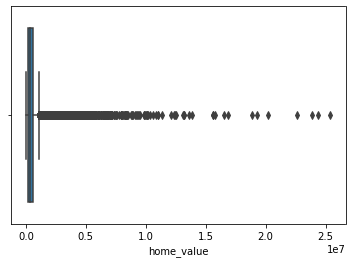

In [61]:
#OG
sns.boxplot(x="home_value", data=df)

<AxesSubplot:xlabel='home_value'>

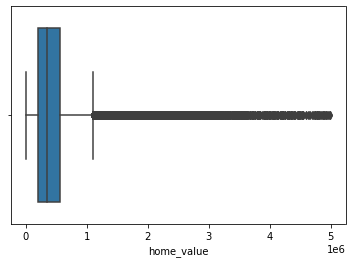

In [60]:
# final cut of outliers
sns.boxplot(x="home_value", data=df[df.home_value < 5000000])

<AxesSubplot:xlabel='home_value'>

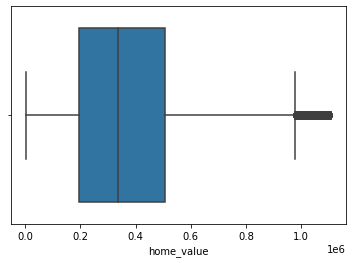

In [26]:
sns.boxplot(x="home_value", data=df[df.home_value < upper_bound])

<AxesSubplot:xlabel='home_value'>

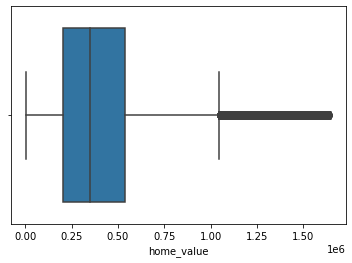

In [27]:
sns.boxplot(x="home_value", data=df[df.home_value < upper_bound1])

<AxesSubplot:xlabel='sqft'>

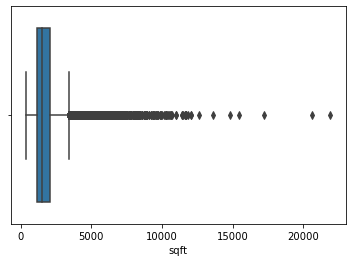

In [62]:
sns.boxplot(x="sqft", data=df)

(3000.0, 22000.0)

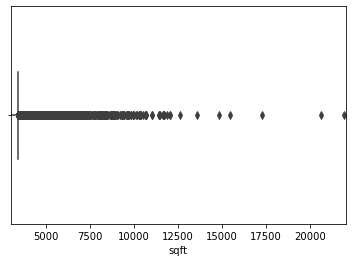

In [65]:
sns.boxplot(x="sqft", data=df)
plt.xlim(3000, 22000)

<AxesSubplot:xlabel='sqft'>

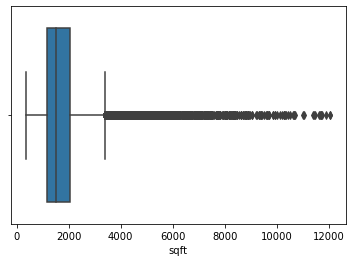

In [68]:
sns.boxplot(x="sqft", data=df[df.sqft < 12500])

<AxesSubplot:xlabel='sqft'>

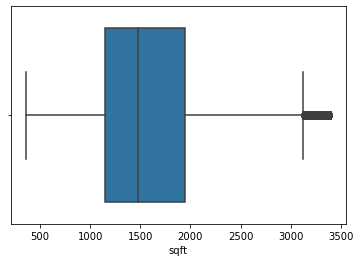

In [64]:
sns.boxplot(x="sqft", data=df[df.sqft < upper_bound2])

In [36]:
upper_bound2, lower_bound2 = w.outlier(df, "sqft", 1.5)
upper_bound2, lower_bound2

(3393.5, -162.5)

In [38]:
upper_bound3, lower_bound3 = w.outlier(df, "sqft", 3)
upper_bound3, lower_bound3

(4727.0, -1496.0)

<AxesSubplot:xlabel='sqft'>

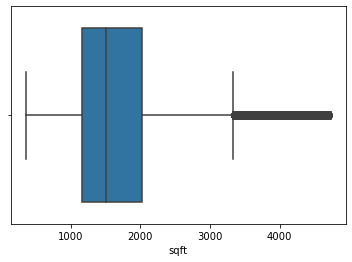

In [66]:
sns.boxplot(x="sqft", data=df[df.sqft < upper_bound3])


In [41]:
df.sqft.describe()

count    72153.000000
mean      1752.089241
std        922.803033
min        360.000000
25%       1171.000000
50%       1517.000000
75%       2060.000000
max      21929.000000
Name: sqft, dtype: float64

In [50]:
(df.sqft > 20000).sum()

2

In [57]:
(df.sqft > 12500).sum()

7

In [58]:
(df.sqft > 10000).sum()

34

In [51]:
(df.sqft > 7500).sum()

129

In [59]:
# outlier m=3
(df.sqft > 4727).sum()

971

In [69]:
df.shape

(72153, 24)

In [71]:
df = df[df.home_value < 5_000_000]

In [72]:
df.shape

(71962, 24)

In [ ]:
df = df[df.calculatedfinishedsquarefeet < 12500]

In [73]:
df.shape

(71962, 24)

In [74]:
df['home_age'] = 2021 - df.yearbuilt

In [75]:
df.head(2)

,parcelid,bathrooms,bedrooms,property_quality,sqft,fips,latitude,longitude,lot_sqft,rawcensustractandblock,...,yearbuilt,structure_value,home_value,assessmentyear,land_value,taxamount,logerror,transactiondate,county,home_age
0,10711855,2.0,3.0,8.0,2107.0,6037.0,34222559.0,-118617387.0,9158.0,6.037113e+07,...,1972.0,249655.0,624139.0,2016.0,374484.0,7659.36,-0.007357,2017-07-07,Los_Angeles,49.0
1,10711877,2.0,4.0,8.0,1882.0,6037.0,34220261.0,-118616409.0,9035.0,6.037113e+07,...,1972.0,253000.0,660000.0,2016.0,407000.0,8123.91,0.021066,2017-08-29,Los_Angeles,49.0


In [76]:
df.shape

(71962, 25)

In [77]:
df['logerror_quartiles'] = pd.qcut(df.logerror, q=4, labels=['q1', 'q2', 'q3', 'q4'])

In [78]:
df.shape

(71962, 26)

# Test out wrangle function

In [7]:
df = w.wrangle_zillow()

In [8]:
df.shape

(71818, 25)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71818 entries, 10711855 to 162960814
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   bathrooms               71818 non-null  float64 
 1   bedrooms                71818 non-null  int64   
 2   property_quality        71818 non-null  int64   
 3   sqft                    71818 non-null  float64 
 4   fips                    71818 non-null  int64   
 5   latitude                71818 non-null  float64 
 6   longitude               71818 non-null  float64 
 7   lot_sqft                71818 non-null  float64 
 8   rawcensustractandblock  71818 non-null  float64 
 9   regionidcity            71818 non-null  float64 
 10  regionidcounty          71818 non-null  int64   
 11  zip_code                71818 non-null  int64   
 12  roomcnt                 71818 non-null  int64   
 13  unitcnt                 71818 non-null  int64   
 14  yearbuilt  